# Business Case

### On the basis of the mobile Specification like Battery power,3G enabled,wifi ,Bluetooth,Ram etc predict the Price range of the mobile.


In [1]:
# Importing all the necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter # counter is a collection which keeps track of how many times equivalent values are added
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data=pd.read_csv('datasets_11167_15520_train.csv')

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
pd.set_option('display.max_columns',None) #will display all the columns in the dataset

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.shape

(2000, 21)

# Domain Analysis

1) battery_power - A cell phone'sbattery power is measured in milliampere-hours(mAh) and refersn to amount of energy a battery can store and deliver over time. A higher mAh rating means the battery can hold more energy and power a device longer.

2) blue - Whether or not cell phone has bluetooth. Bluetooth is a wireless technology that allows devices to connect and exchange data without the need of cables and wires. It works by using short range radio waves to communicate between devices that are close together.
 
3) clock_speed - The clock speed determines how many instructions the processor can execute per second. A processor with a 1-Gigahertz(GHz) clock speed can process 1 billion iinstructions per second. Generally, "higher the clock speed faster the phones". This can often be seen with expensive smartphones.
 
4) dual_sim	- A mobile phone with the capacity to use two subscriber identity module(SIM). This is beneficial and handy for busy professionals who wants to keep their personal and work calls separate. Simply use one sim for work andthe other for personal stuff. Having dual SIMs will draw more battery since the phone would need to listen and occasinally communicate with the network even when not in ctive use. Simply two networs would use twice the power. Having dual SIM limits the simultaneous network access. Dual SIM device rediates 40-80% higher than a single SIM device.

5) fc - A cell phone's front camera (fc) megapixels determine the resolution of the camera and the quality of the images it takes. For higher resolution and more detailed images 10-12 megapixels camera is used while 5-8 megapixel is considered a good range for selfies.
 
6) four_g - 4G is a fourth-generation wireless, the stage of broadband mobile communications that supersedes 3G and is the predecessor of5G. The 2G technology was suitable for making calls and sending text messages, while 3G and 4G makes it possible to access internet more effectively through your mobile phone.
 
7) int_memory - it is Internal Memory in Gigabytes. Internal memory is where all the Apps, photos, games are stored in mobile. Internal memory is a digital flash memory with loe energy requirements, on which a non-volatile backup of data is possible. Non-volatile means that the data is retained when there is no power. The module contain a memory block and a microcontroller.
 
8) m_dep - Mobile Depth in cm.

9) mobile_wt - Weight of mobile phone, It vary significantly based on the model,size and materials used in its construction.A smart phone typically weigh between 113-198 grams.
 
10) n_cores - Number of cores of processor. Most modern phones have 2 processors (also known as "cores"). One is designed for handling high-performance task and the other is optimized for power efficiency. The combination of these two processors allows for a balance of performance and battery life. Thespeed of smartphone is also influenced by the number of processor cores it has. The processor comprises multiple cores, categorized as Dual,Quad,Hexa and Octa core.

11) pc - It is a primary camera of a mobile phone in megapixel. The primary camera of a mobile phine vary depending on the phone but a good range for most users is 12-50MP.
F
12) px_height - The Pixel Resolution Height of a mobile phone is the number of pixels that make up the height of a screen.
 
13) px_width - The Pixel Resolution Width of a mobile is the number of pixels across the screen.

14) ram - Phone memory refers to Random Access Memory (ram) in Megabytes. RAM is the part of the phone that is used to store the operating system (OS) and where apps and data currently in use are kept. Whereas the phone storage is used to store the data such as apps,photos and the files that are necessary for the phone to run. RAM is not responsible for performance.F RAM enables us to do multiple operations in less time.
 
15) sc_h - Screen Height of mobile in cm.

16) sc_w - Screen Width of mobile in cm.

17) talk_time - Talk time is the officially quoted longest time that a single battery charge will last when you are constantly talking on the phone. The talk time is highely dependent on the cellular network environment such as the distance to the closest GSM cell tower.
 
18) three_g - If the phone has 3G network or not. 3G and 4G makes it possible to access internet more effectively through your mobile phone.
 
19) touch_screen - whether the phone is touch screen or not.
 
20) wifi - If the phone has wifi. Wi-Fi is a wireless technology used to connect computers,smartphones and other devices to the internet.
 
21) price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Basic checks

In [7]:
data.head() #first five rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.tail() #last five rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [12]:
data.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### Insites

1. Data curruption can be seen in few columns such as pixel heightand screen width as the pixel height refers to the screen and it cannot be 0. It is same for the Screen width it cannot be 0.
2. The data indicates that there are no missing values and total 2000 entries for all 21 columns.
3. The 0s of minimum values of few columns like blue,dual_sim,fc,four_g,pc,touch_screen,wifi,three_g simply indicates the yes or no, that is 0 and 1 values for having and not having the respective feature in it.
4. There are total 4 price range/categories in the Target column.
5. No column shows a complete 0 value for standard deviation which indicates that there are no constant values in the columns.
6. Dataset has no categorican columns in it, so there will be no need to transform the data.
7. The target (price_range) column has 4 unique values and each has 500 entries which indicates that the data is balanced which ultimately results in unbiasedness of the Algorithms applied.

# EDA

Univariate analyis using sweetviz and histplot to check the distribution of the data

In [14]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
contdata=data[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

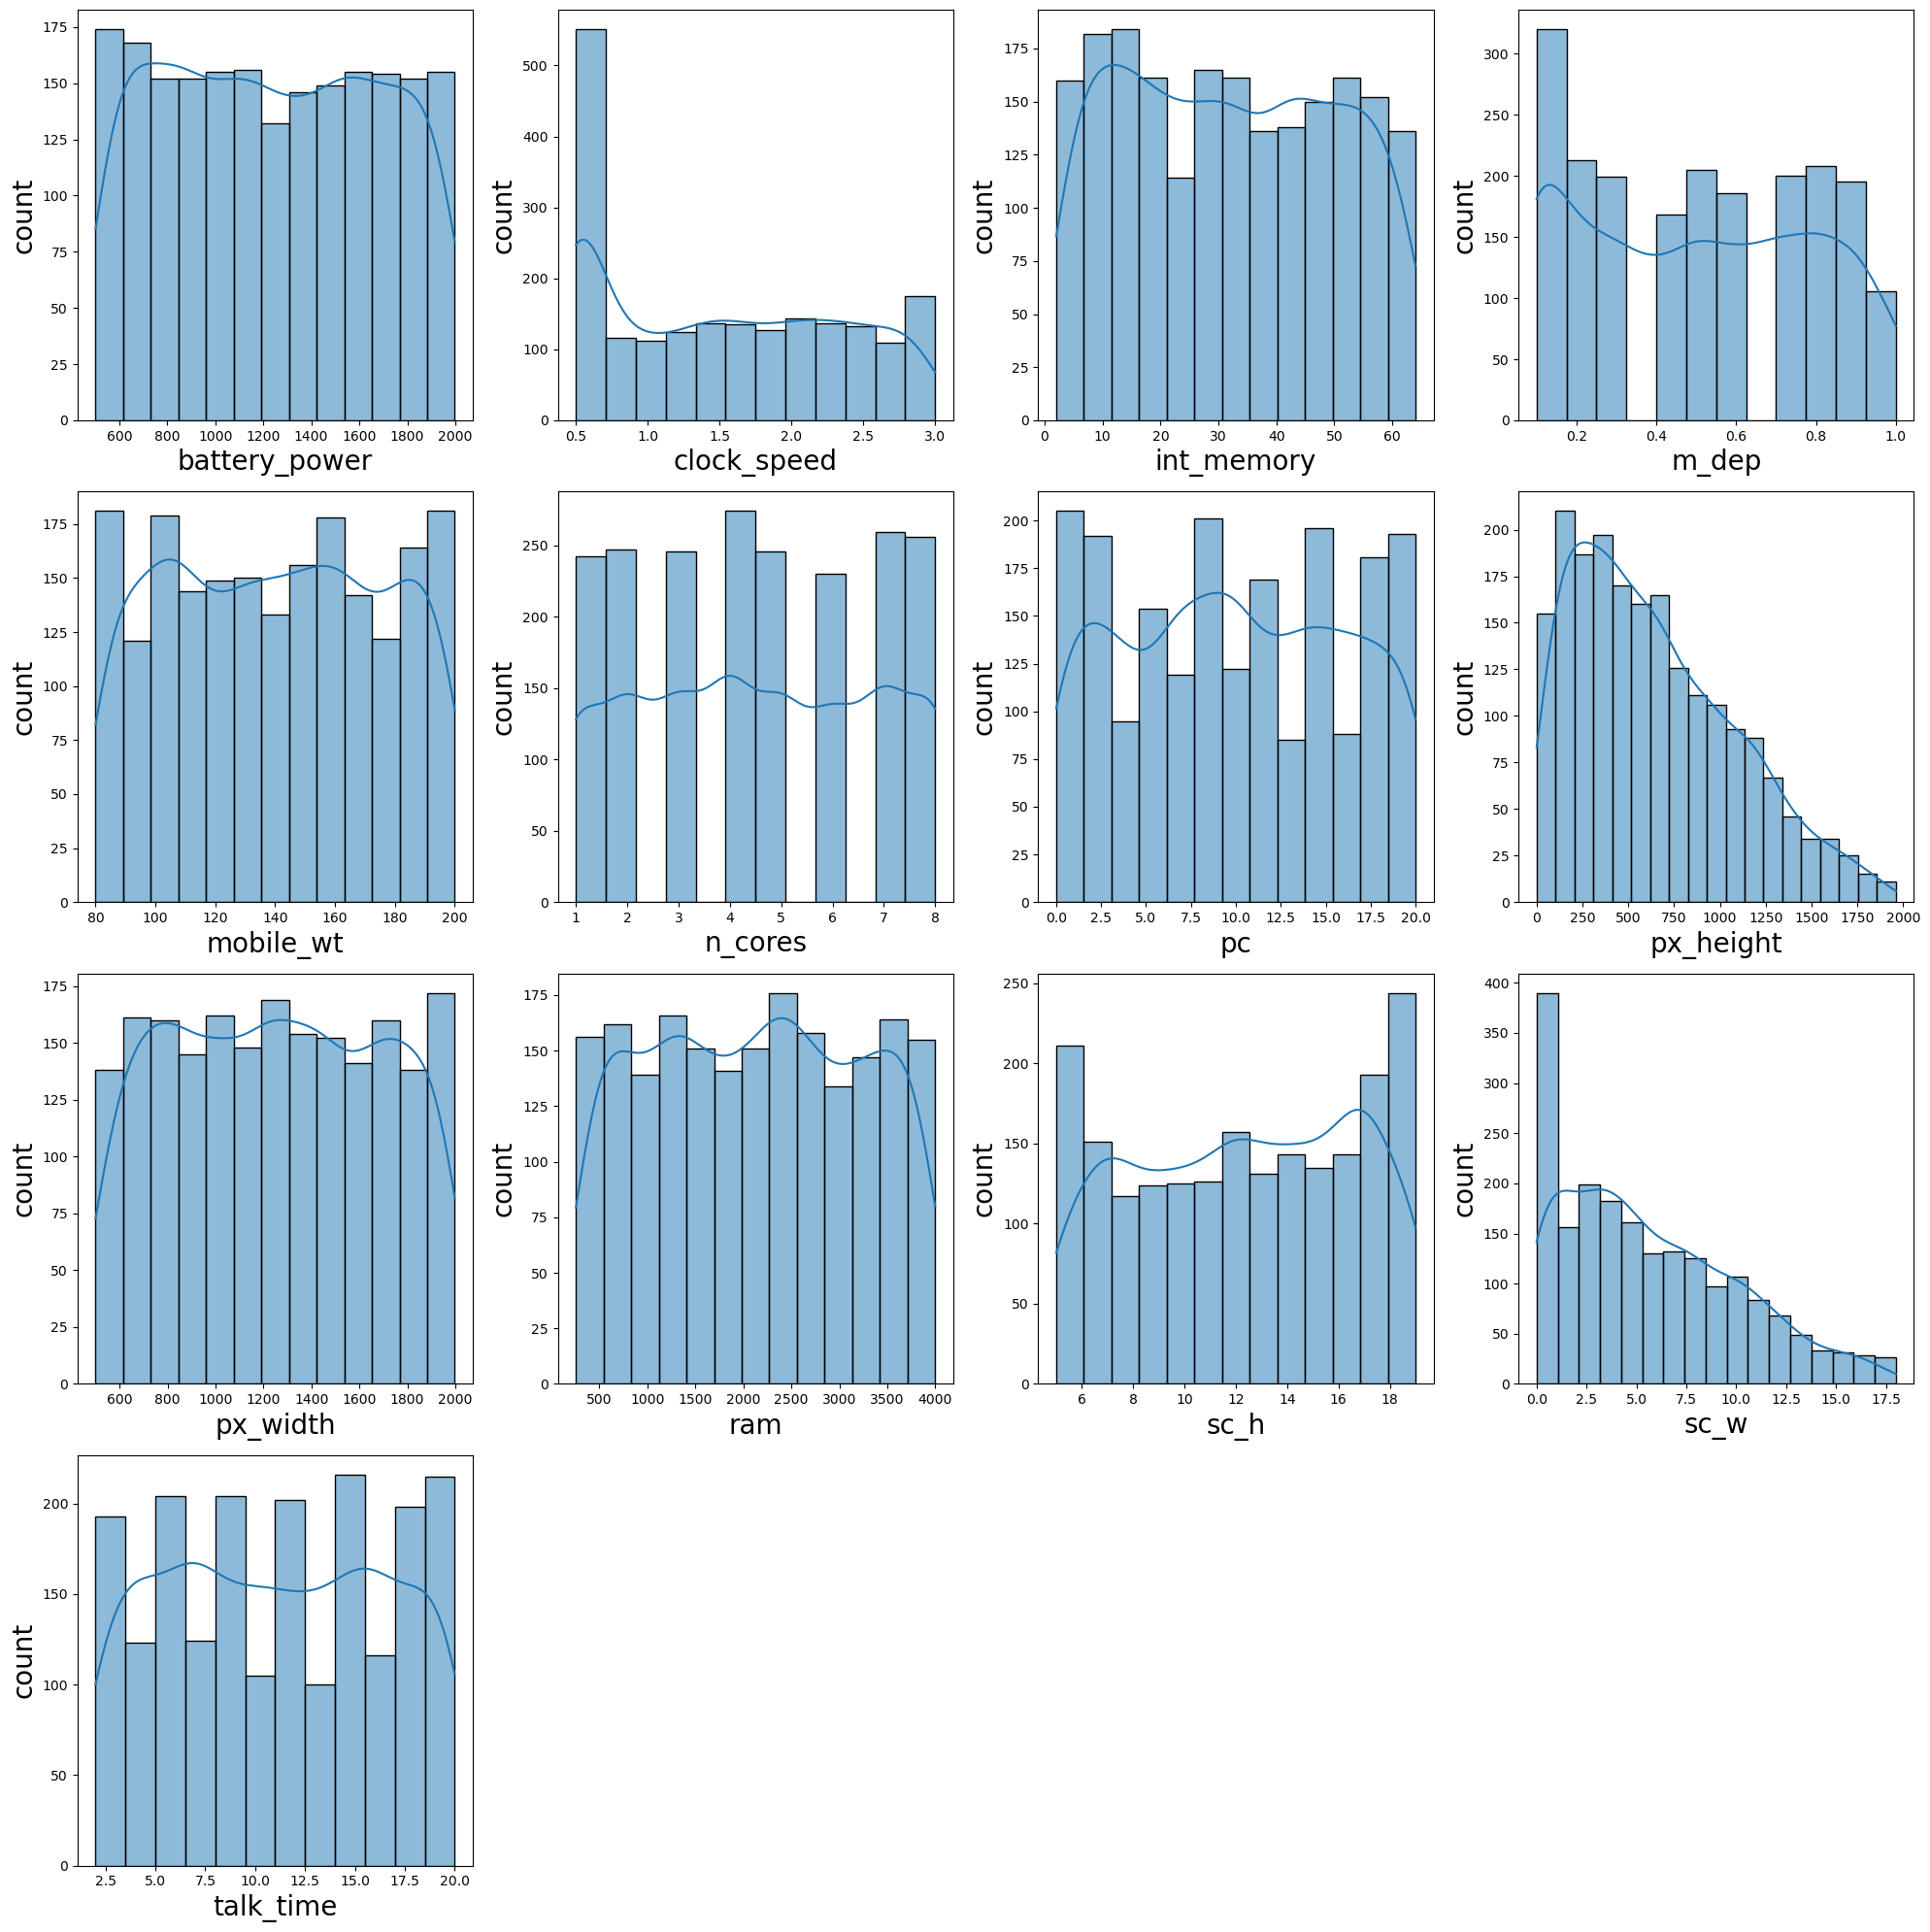

In [16]:
plt.figure(figsize=(20,20),facecolor='White')
plotnum=1

for column in contdata:
    if plotnum<=13:
        ax=plt.subplot(4,4,plotnum)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnum+=1
plt.tight_layout()

### Insites

1. None of the columns shows noramally distributed data.
2. Columns pixel_height and sc_w shows highely skewed data.

In [17]:
report=sv.analyze(data)
report.show_html() #it will generate a report

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insites

Battery Power
1) The column shows no missing values.
2) Battery power shows high positive corelation with price range.
3) All of the cellphones battery power lies between 500-2000 mAh.

Blue
1) This column represents whether or not mobile phone has Bluetooth feature.
2) About 50% of the phones has Bluetooth in it and the other 50 % does not have the feature.
3) Bluetooth does not shows hight correlation with any of the column.

Clock Speed
1) The clock speed determines how many instructions the processor can execute per second.
2) More than 30% phones shows the clock speed less than 1.
3) About 35% phone shows clock speed more than 2.

Dual SIM
1) This column indicates if the phone has dual sin or not
2) About 51% phones are of dual SIM.
3) Only 49% phones have single SIM slot.
4) This feature shows +ve correlation with battery power,ram and talk time.

Front Camera
1) More than 23% of the phones does not have front camera.
2) Other 77% of the phones possess 1-19 MP front camera.
3) This feature shows +ve correlation with price range.

Four g
1) This feature tell us if the mobile phone is four g,which helps in connecting phone to other network.
2) 52% of the phones are 4g and remaining 48% is mostly 3g.
3) This feature does not show any correlation with price range.

Int Memory
1) Shows high +ve correlation with mobile depth,number of cores and price range.
2) As Higher the internal memory higher the price of the phone.
3) Internal memory of the phone is varying from 1GB to 60GB.
4) Only about 10% of the phone higher internal memory of 60GB.
5) It shows -ve correlation with battery power,that means nore the internal memory less the battery power.

Mobile Depth
1) This column does not show any -ve correlation with any other feature.
2) Shows +ve correlation with clock speed,primary camera,internal memory.

Mobile Weight
1) The weight of the isted mobiles varies between 80-200 grams.
2) Shows +ve correlation with price range.

Number of Cores
1) More than 85% of the phones have more than 1 Number of core processor.
2) This feature does not have any relation with price range, that means even if the no. of cores is less it will not have impact on the price range.
3) However it does shows +ve correlation with int memory and screen width.

Primary Camera
1) More than 75% of the phones have primary camera of more than 12 Mp.
2) About 14% of the phones have camera of 18-20 Mp.
3) Shows correlation with mobile depth ad number of cores.

Pixel height and Width 
1) This feature shows 35% correlation with price range combined.
2) More than 18% of the phones have pixel height above 250.
3) Less than 2% of the phones shows pixel hieght more than 1750.
4) Pixel width in phones varies between 500-2000.

Ram
1) This is one of the important features in mobile as it has highest +ve correlation with price range.
2) Higher the ram of the mobile higher the price.
3) The ram of the mobile varies between 250-4000.
4) More than 10% of the phones shows ram above 3500.
5) It shows -ve relation with battery power, as higher the ram more the batery will drain.

Screen Height and Width
1) These features have moderate correlation with price range.
2) Screen width data indicates skewness which suggest higher no of mobile phones have less screen width.
3) Height of the screen highely depends on width of the screen.
4) Graph suggest that more the screen height less the width.

Talk Time
1) Talk time depends on battery power of the mobile phone.
2) This feature shows +ve correlation price range.

Three g
1) More than 45% of the phones are 3g and provides information on 4g

Touch Screen
1) Half of the phones are touch Creen.
2) This column does not have any -ve relation with other features.
3) It has correlation with ram,internal memory.

WiFi
1) More than 50% of the phone has wifi.

Price Rnage
1) Every category has equal amout of data in it, that is 25% each.
2) has high correlation with ra,battery power,pixel height and width.

## Conclusion

1) Based on the insites from univariate analysis we can say that features like Battery power,Front camera,Internal Memory,Ram has direct relation to price range.
2) While features like Bluetooth,dual SIM,wifi does not contribute to the price range as compared to other features.
3) Young customers will go for a mobile phone with features like Battery life,Ram and No of cores of processor as these features directly contribute to speed and performance of the mobile phone while playing vedio games, high quality pictures and good internet speed.
4) While middle age customers are mostly working professional and home makers who does not care much for the performance of the phone but the basic features like talk time,dual SIM,wifi,primary camera etc.

Bivariate analysis using histplot

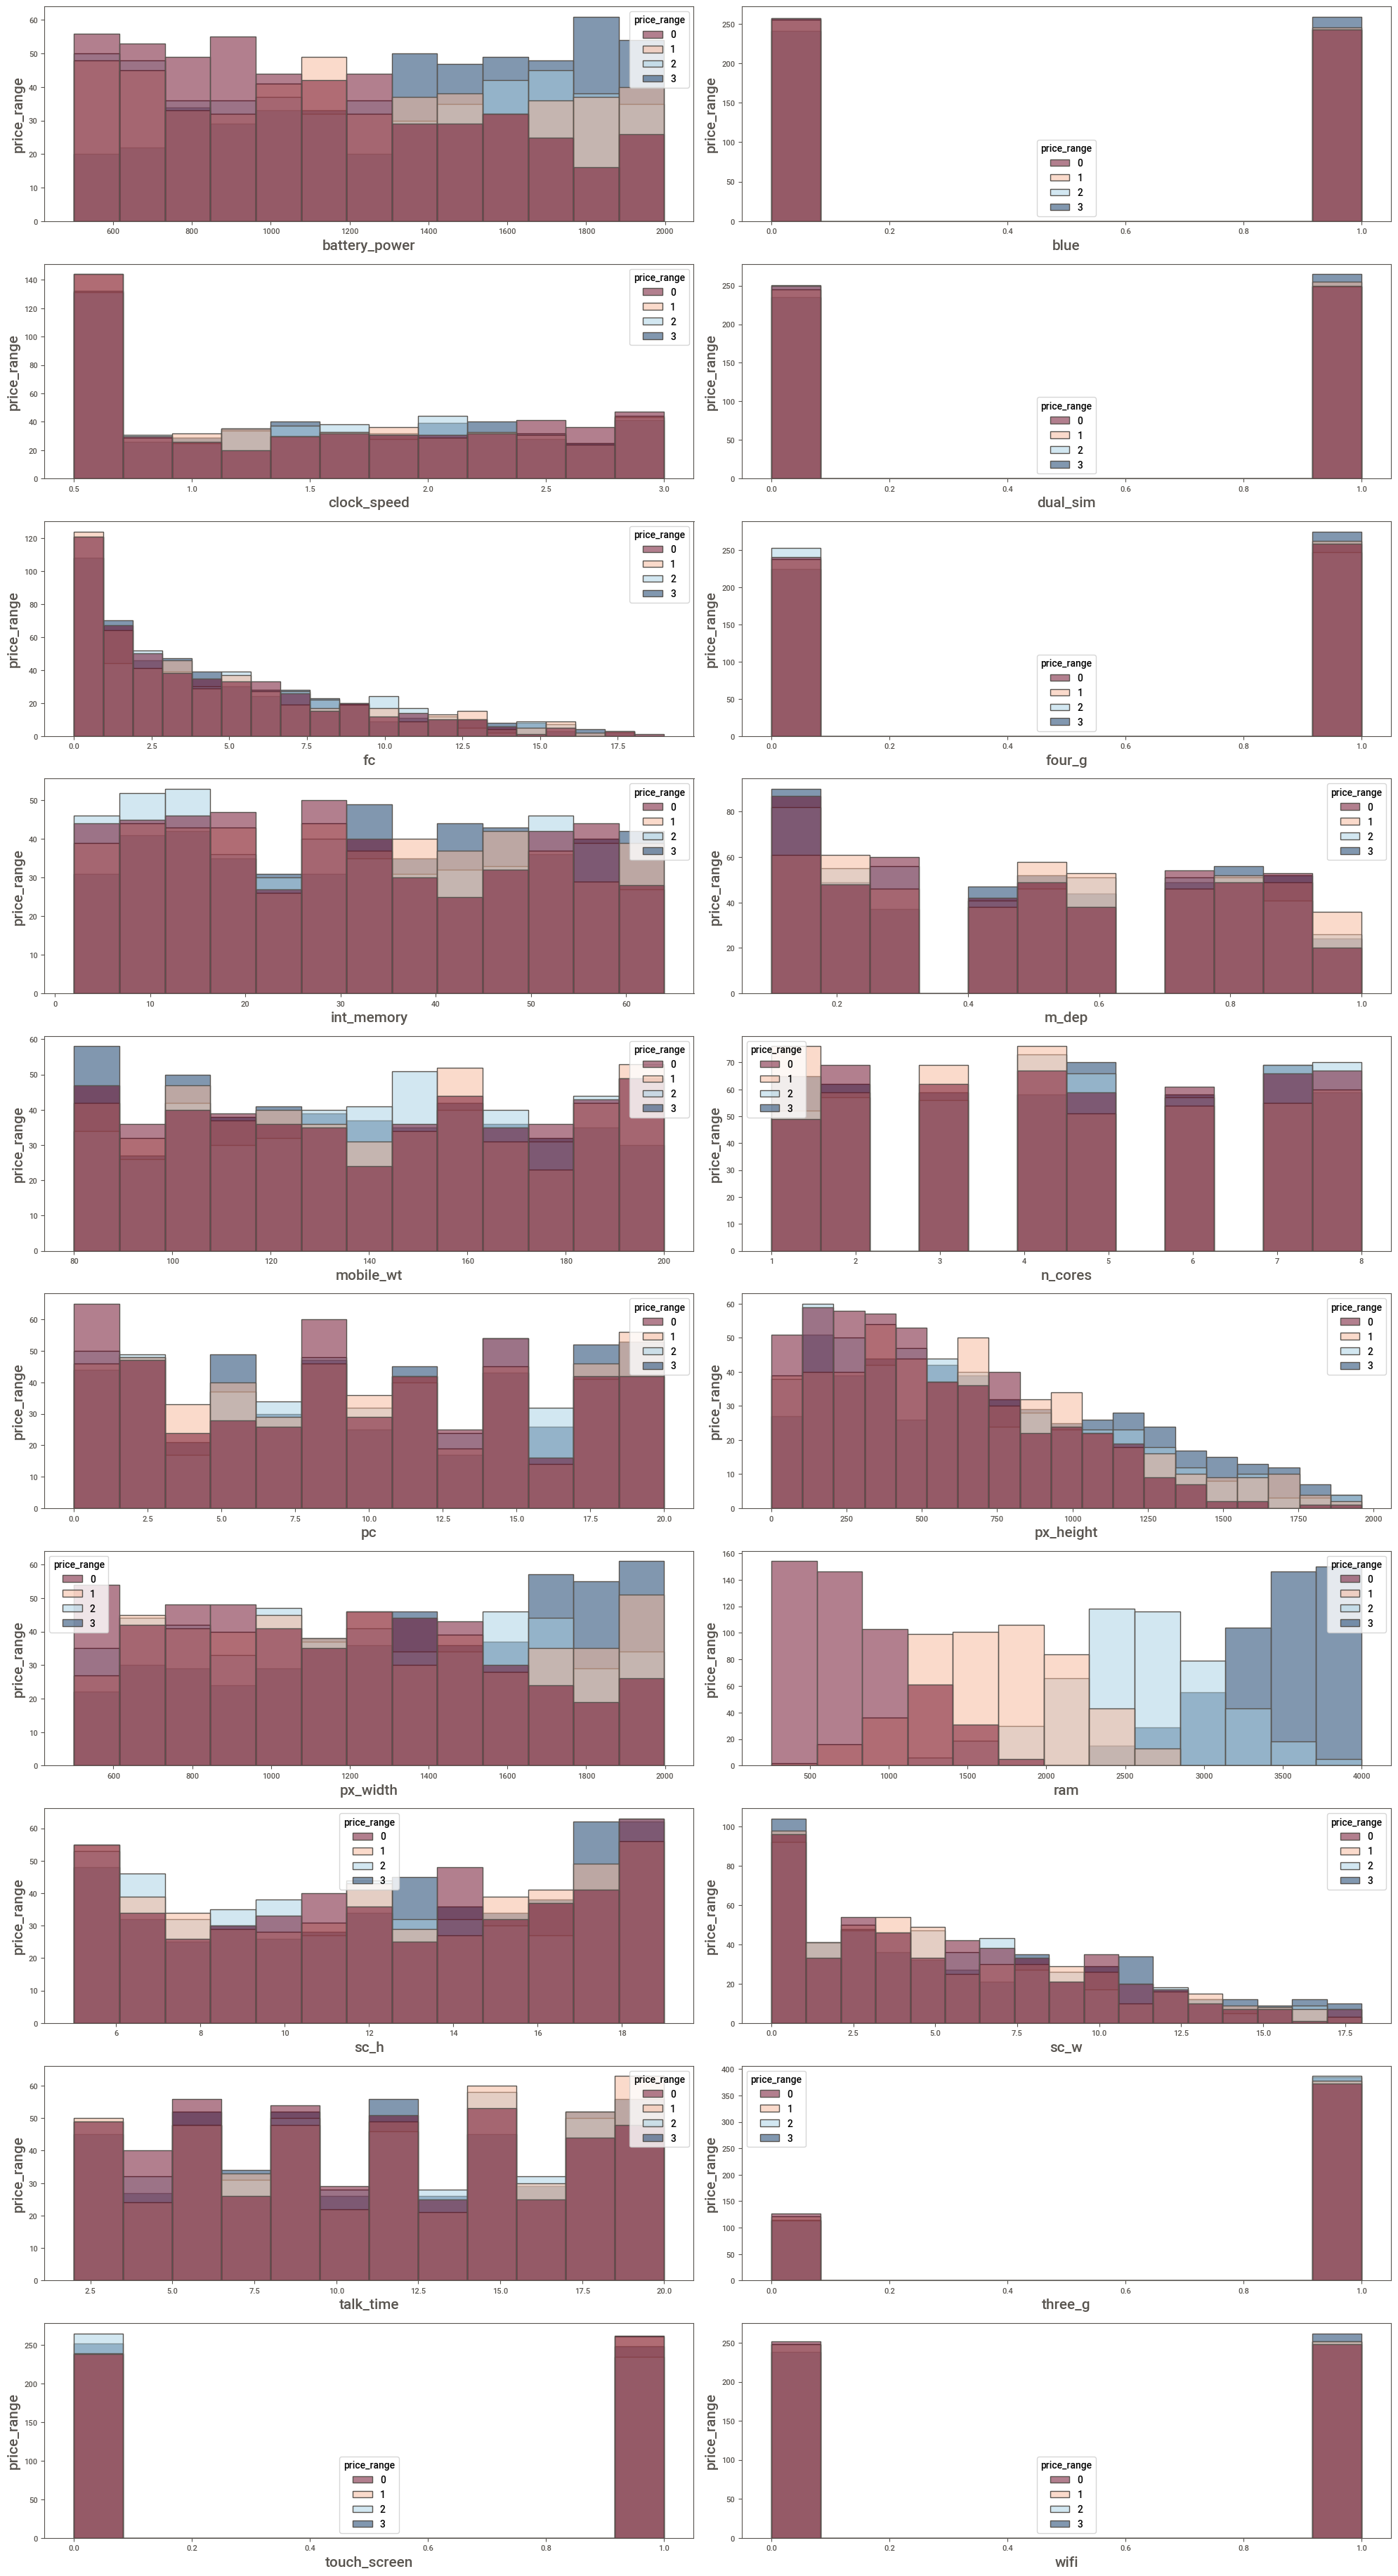

In [18]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1

for column in data:
    if plotnum<=20:
        ax=plt.subplot(11,2,plotnum)
        sns.histplot(data=data,x=data[column],hue=data['price_range'],palette='RdBu')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('price_range',fontsize=15)
    plotnum+=1
plt.tight_layout()

### Insites

Battery power
1) We can see in the graph how battery power of the phone directly affects the price range.
2) Phones with less to moderate battery power(600-1200 mAh)has low to medium cost.
3) While phones with high battery power(1300-2000) has high to very high cost.
4) As the Battery power increses the cost of the mobile also increases.
   

Bluetooth
1) Having Bluetooth slighty affect the price range as we can see phones with bluetooth has high cost.

Clock speed
1) As per the graph we can say that mejority of the mobile phones has less clock speed thus have low to mediun cost.
2) Phones with high clock speed does affect the cost from medium to high.

Dual SIM and 4g
1) This feature also affect the cost of mobile phones moderately.
2) Dual SIM mobile phones have slightly higher cost than those of single sim mobile phones.
3) 4g phones have very high cost as it comes with better performance.
4) while 3g and 2g phones have less cost as compard to 4g phones.

Front Camera
1) Majority of the phones does not have front camera hence the cost is low.
2) While phones with front camera has medium to very high cost based on the Mp.
3) The price of the phone increses with the no of megapixel of the front camera.

Internal Memory
1) This feature plays as important role hence irrespective of the model the cost of the mobile increses.
2) Phones with low to medium internal memory has moderate cost while mobiles with more than 25 GB internal memory has very high cost.

Mobile Depth and Weight
1) Mobile depth feature has no direct relation to price range however it shows positive correlation with internal memory and clock speed thus directly affects the price range.
2) We can see the irregularity of price range.
3) While Mobile weight has direct relation with screen size,material used and heavy battery, resulting in moderately high cost.
4) Some mobile phones are less havier than other which makes it slim and easier to carry hence we can see less mobileweight has high cost.

Number of Cores
1) No of core processors is responsible for good and fast performance of the phone hence it increases the value of the mobile without having any additional features.

Primary Camera
1) Primary camera of the phone add the values to it,even if there is no front camera the price increases significantly.
2) More the Mp of the camera more the cost of the mobile. Price increases with the quality of the camera.

Pixel Height and Pixel width
1) Pixels are dimentional size. More the pixel height less the width.
2) Hence it can be seen in the graphs that as the height of pixel increases it also increases the cost of the mobile.
3) However there is drastic change in price if the pixel width is more than 1600.
4) The cost is moderate and low for low pixel width.

Ram
1) Ram directly affects the price of the mobile phone as most important feature depends on it.
2) Hence we can see that mobile with ram less 2000 has low to medium cost.
3) However we see drastic change in cost for the mobile phones with ram more than 2000-4000.

Screen Height and Width
1) As seen in the Univariate Analysis Screen height contributes moderately to the price range.
2) Young customers are attracted to long devices rather than big hence it can be seen in the graph That Screen height affect the price range than the screen width.

Talk time
1) A trend can be seen in the graph, can say talk time affect the price of the mobile slightly.

Touch Screen, 3g and Wifi
1) Mobile phones with 3rd generation core and wifi has slightly higher cost.
2) Touch Screen has very higher cost than that of non touch screen.

## Conclusion
1) Mobile with higher Ram,good internal memory and excellent battery life will be cost very high.
2) On the other hand if we consider features like wifi,bluetooth,dualsim,4g and moderate camera nad battery life cost will be medium as compared to very high.

# Data Processing

In [19]:
# checking for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
# checking for duplicate values
data.duplicated().sum()

0

In [21]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


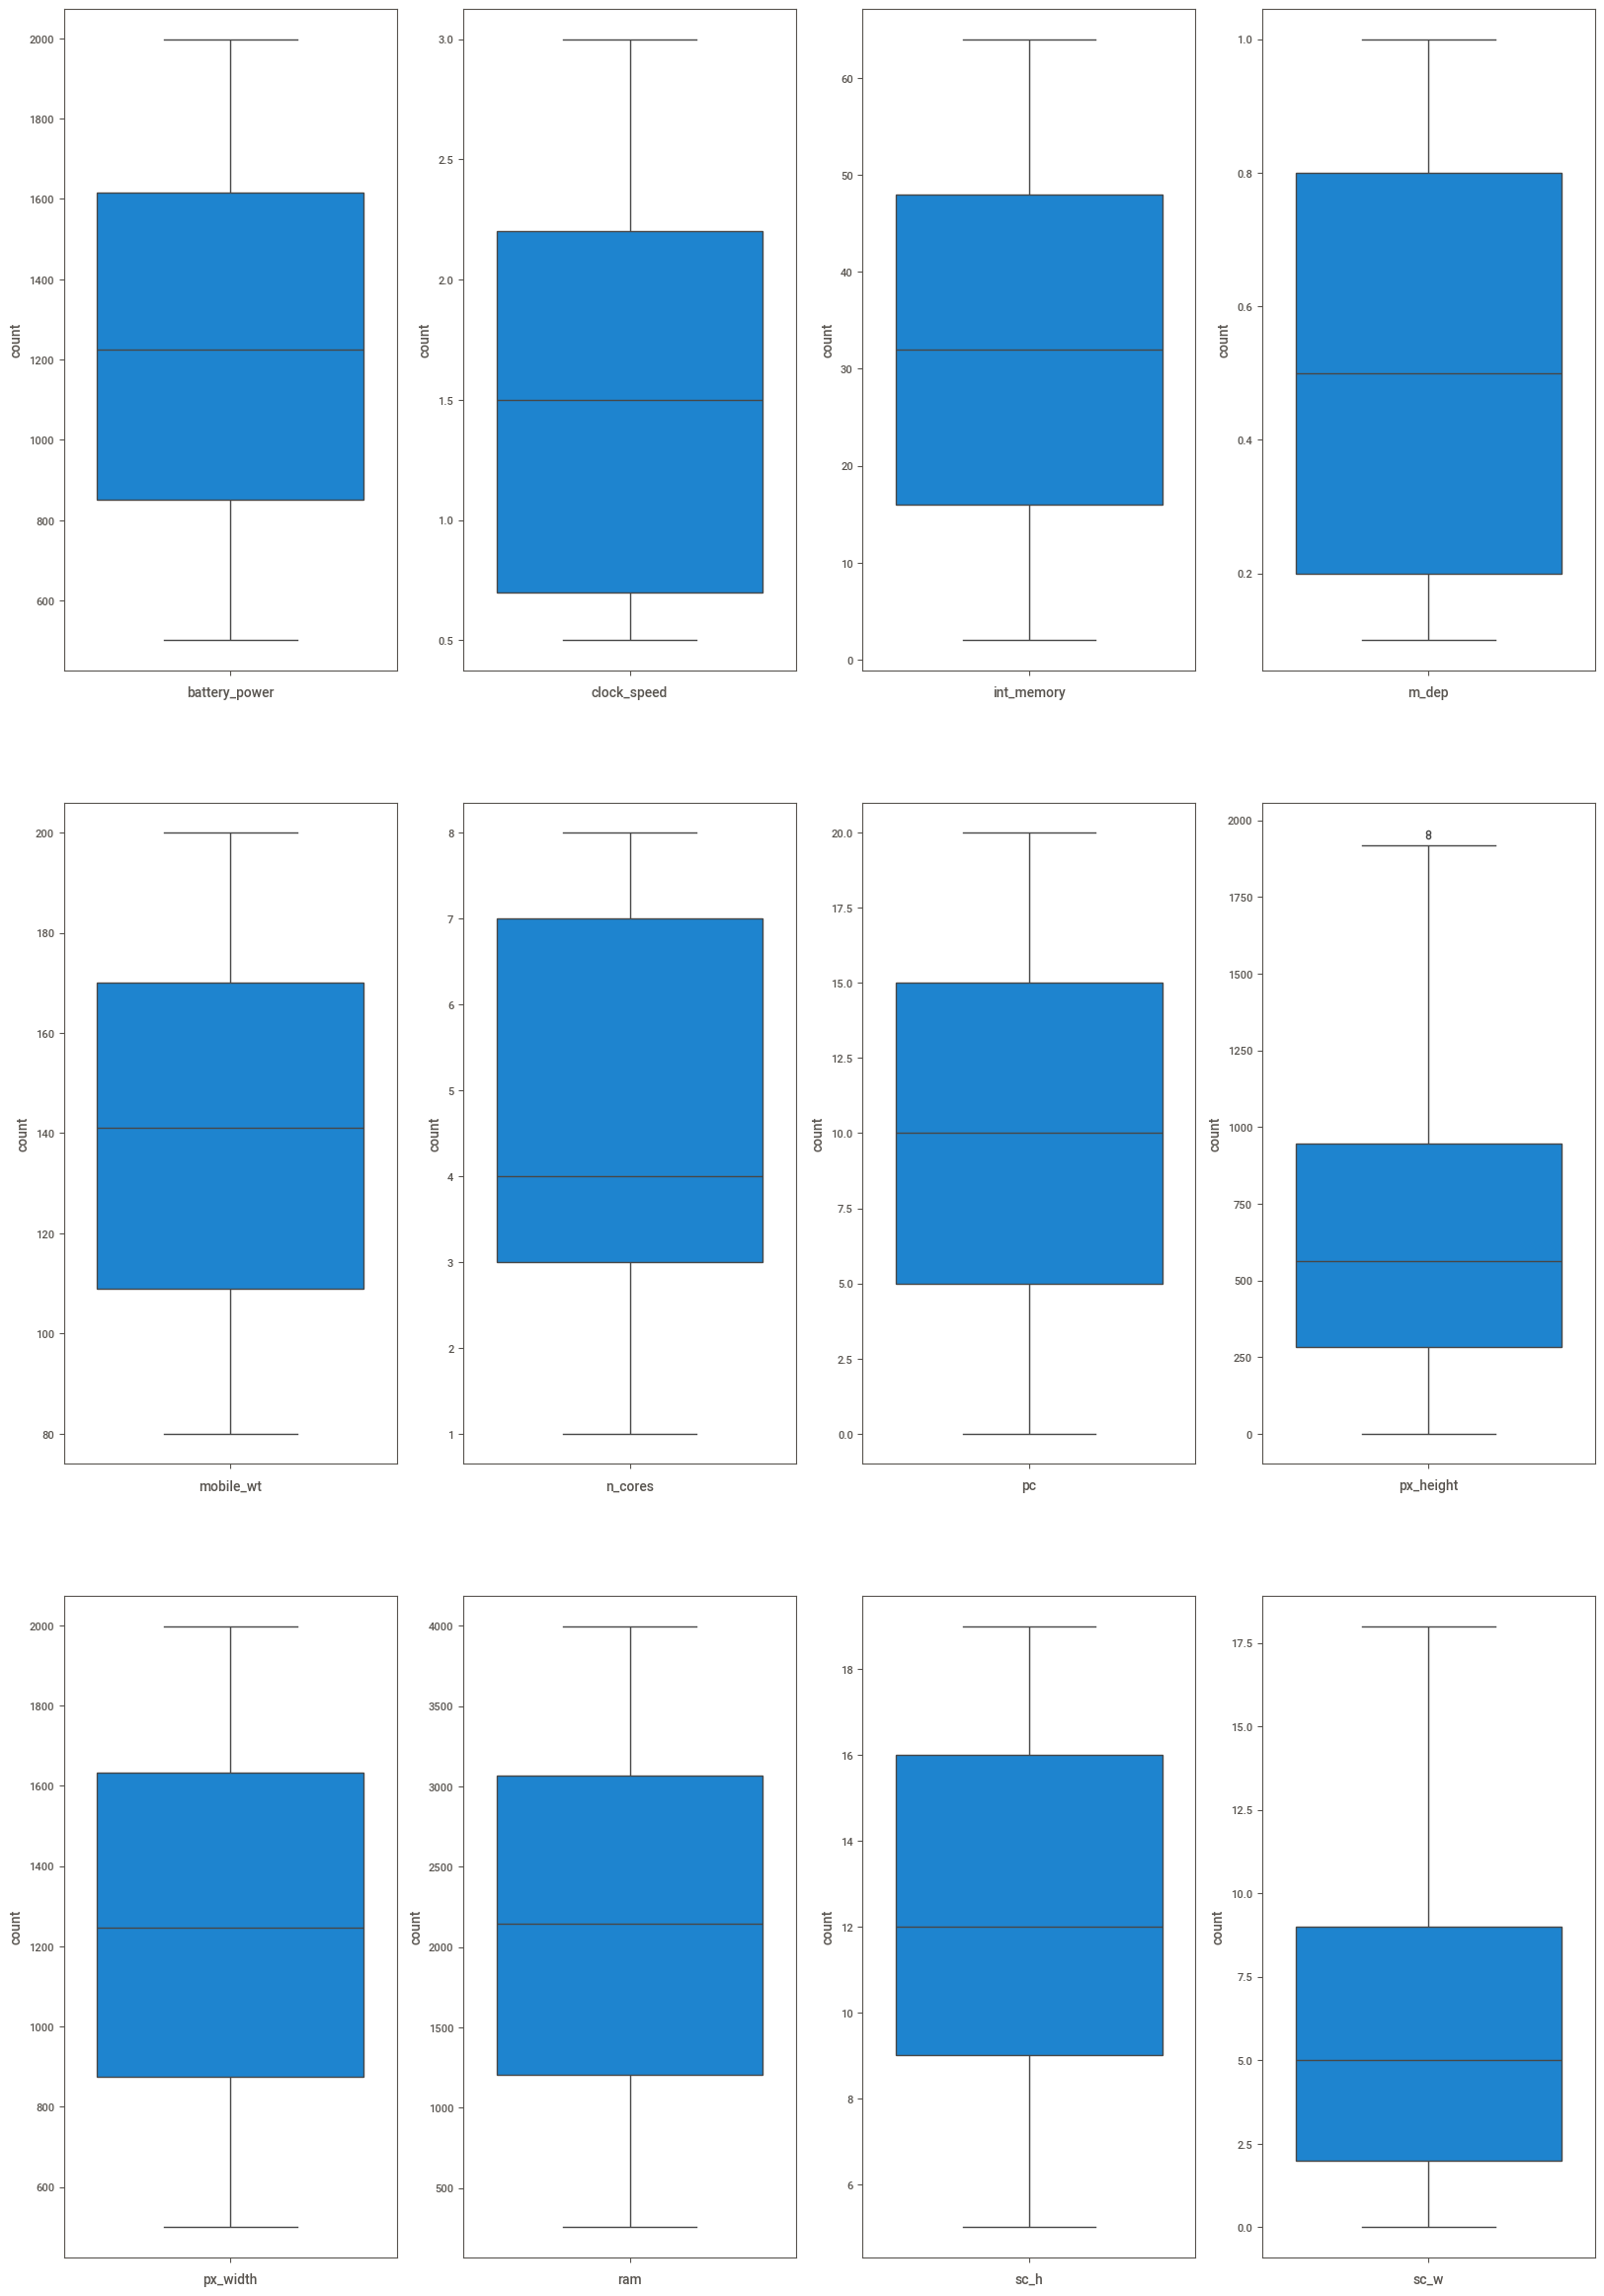

In [22]:
# checking for outliers using boxplot

plt.figure(figsize=(20,40))
plotnum=1

for column in contdata:
    if plotnum<=12:
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel('count')
    plotnum+=1


### Insites

1. Only pixel_height column shows presence of outliers.
2. As pixel_height has highely positively skewed data we will use IQR method to impute the outliers.

In [23]:
Q1=data.px_height.quantile(0.25)
print('Q1',Q1)

Q3=data.px_height.quantile(0.75)
print('Q3',Q3)


Q1 282.75
Q3 947.25


In [24]:
IQR=Q3-Q1
IQR

664.5

In [25]:
min_limit=Q1-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3+1.5*IQR
print('max_limit',max_limit)

min_limit -714.0
max_limit 1944.0


In [26]:
data.loc[data['px_height']<min_limit] #no outliers in nevetive direction

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [27]:
data.loc[data['px_height']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [28]:
data.loc[data['px_height']>max_limit,'px_height']=np.median(data['px_height']) # as the data is skewed we are using median 

In [29]:
data.loc[data['px_height']>max_limit] #outliers imputed

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<Axes: xlabel='px_height'>

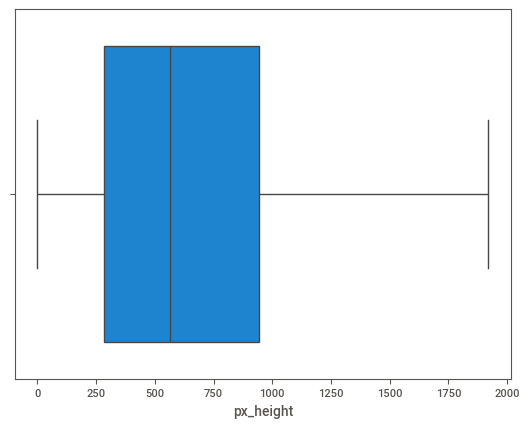

In [30]:
sns.boxplot(data=data,x='px_height')

We have seen in Basic Checks that the Target veriable is perfectly balanced that means each of the class has total 500 samples. As the data is balanced there is no need to perform the "Balancing the Data" step in order to prevent the algorithms from being biased.



As there are no categorical columns in the dataset no conversion of categorical data to numeric data/Transformation is required.

# Scaling

 Using StandardScaler to Scale the data as we are doing multiclass classification we need to need to do scaling in between -3 to +3

In [31]:
scaler=StandardScaler()
c1=['price_range'] #creating a seperate veriable for target column
scddata=scaler.fit_transform(data.drop(c1,axis=True)) # fitting and transforming the data

In [32]:
scddata # gives default result in array, we need to convert this into new dataset

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [33]:
data1=pd.DataFrame(scddata,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [34]:
data1 #created a new dataset without the target column

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.309105,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.614124,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.507727,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696605,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [35]:
target=data['price_range'] # creating a different veriable for target column

In [36]:
# combining all the datasets together to make the final dataframe
finaldata=pd.concat([data1,target],axis=1) #combining all the dataframes into one findal dataframe
finaldata

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.309105,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.614124,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.507727,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696605,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,0


# Feature Selection

<Axes: >

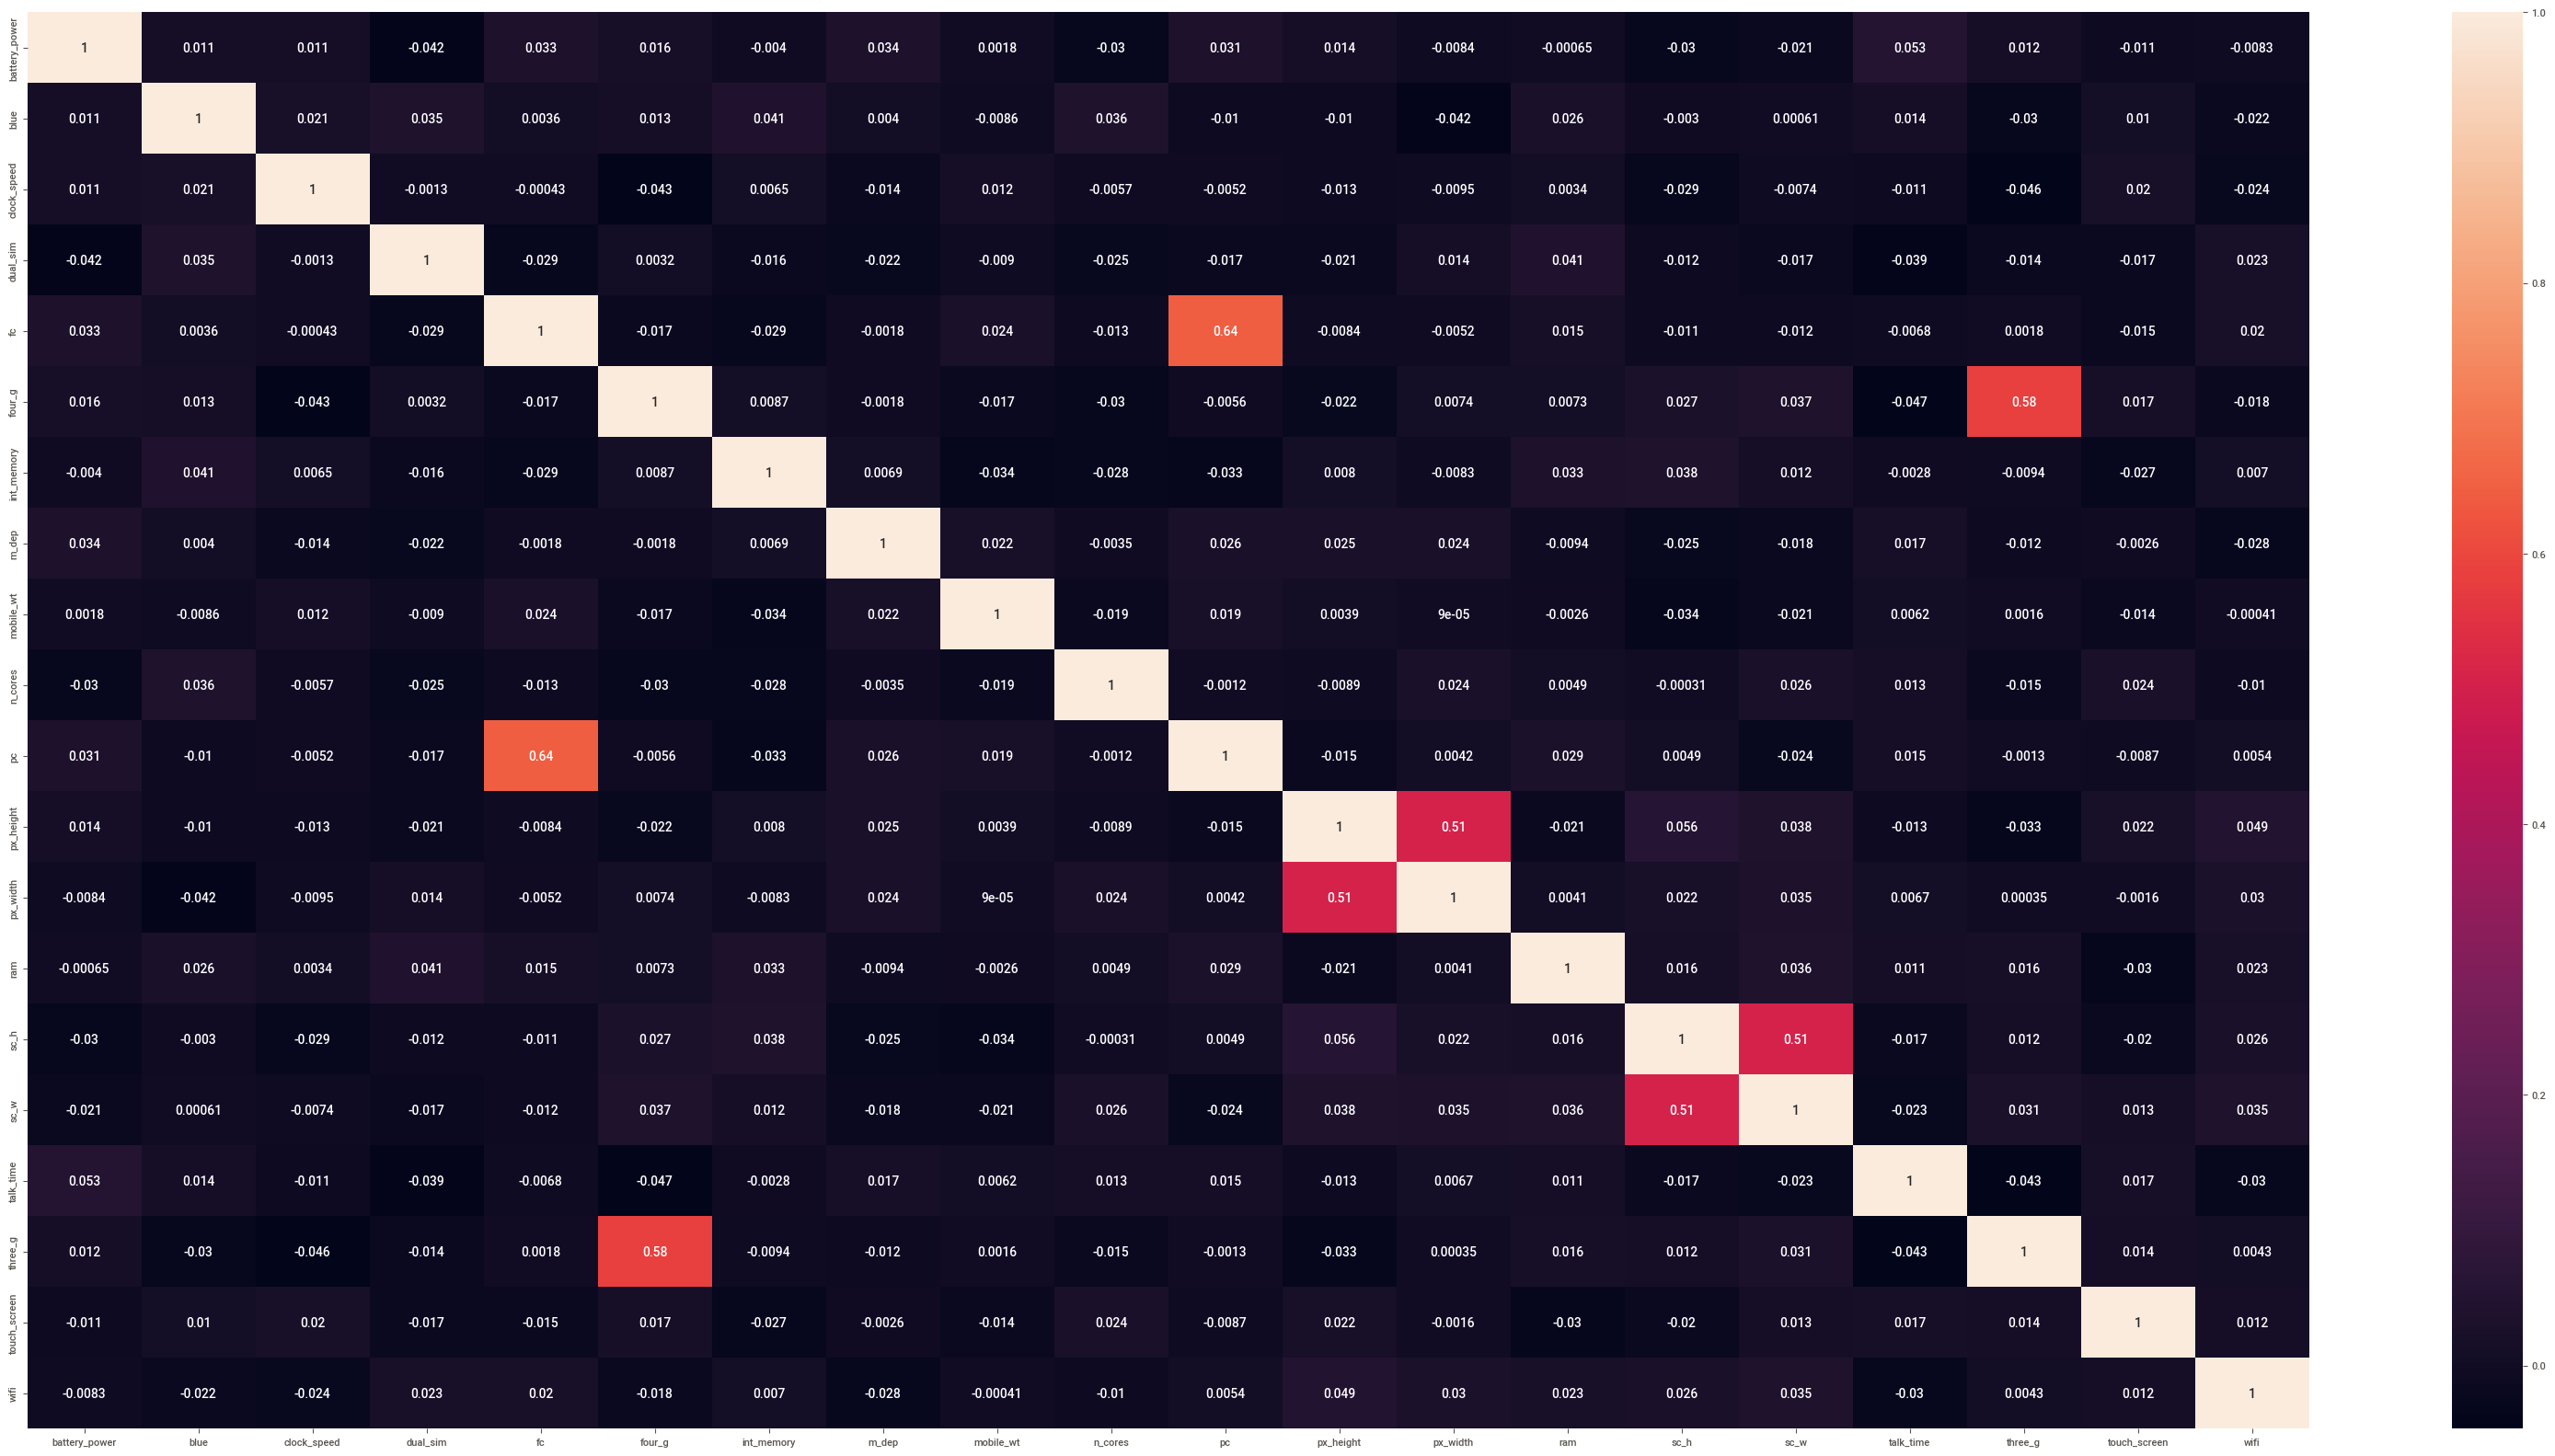

In [37]:
plt.figure(figsize=(40,20))
sns.heatmap(data1.corr(),annot=True)

The heatmap shows no corellation between two independent features hence no feature should be dropped.

# Model Creation

In [38]:
# Creating independent and dependent variable.

X=finaldata.iloc[:,:-1] #slicing the dataset, Traget column should be dropped
y=finaldata.price_range

In [39]:
# Creating the training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)


In [40]:
X_train.shape # 80% of the data dor training

(1600, 20)

In [41]:
X_test.shape # 20% of the data for testing

(400, 20)

# Logistic Regression Model

In [42]:
# creating a veriable for logistic regression

lr=LogisticRegression()

In [43]:
# training the data on the model

lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
#prediction

y_lr_predict=lr.predict(X_test)

In [45]:

y_lr_predict

array([1, 1, 3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 2, 1, 3, 3, 0, 1, 2, 0, 2, 3,
       3, 2, 0, 0, 1, 0, 3, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       3, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 1,
       3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 3, 0, 2, 2, 3, 2, 2,
       1, 2, 1, 0, 2, 1, 3, 3, 2, 3, 0, 2, 0, 1, 0, 3, 2, 2, 2, 2, 1, 2,
       2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 0, 0, 1, 0, 2, 3, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 1, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0,
       2, 2, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 2, 0, 3, 2, 2, 0, 1, 2, 1, 0,
       3, 1, 1, 0, 3, 0, 3, 3, 3, 1, 0, 0, 2, 1, 3, 2, 1, 3, 3, 1, 2, 3,
       2, 3, 1, 2, 0, 2, 0, 1, 0, 2, 2, 3, 3, 0, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 3, 2,
       1, 3, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 3, 2, 1,
       3, 1, 1, 3, 3, 0, 3, 1, 3, 3, 1, 0, 0, 3, 1,

In [46]:
y_lr_predict_={'zero':0,'one':1,'two':2,'three':3}

### Evaluation

In [47]:
cm=confusion_matrix(y_test,y_lr_predict)
cm

array([[101,   1,   0,   0],
       [  2, 101,   2,   0],
       [  0,   2,  88,   5],
       [  0,   0,   2,  96]], dtype=int64)

In [48]:
acc_lr=accuracy_score(y_test,y_lr_predict)
acc_lr 

0.965

In [49]:
recall_lr=recall_score(y_test,y_lr_predict,average='macro') #macro will calculate the recall score for each label and will give mean.
recall_lr

0.9645021166361283

In [50]:
precision_lr=precision_score(y_test,y_lr_predict,average='macro')
precision_lr

0.9646882897652691

In [51]:
f1_lr=f1_score(y_test,y_lr_predict,average='macro')
f1_lr

0.9644684054708199

In [52]:
classrpt_lr=classification_report(y_test,y_lr_predict)
print(classrpt_lr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       102
           1       0.97      0.96      0.97       105
           2       0.96      0.93      0.94        95
           3       0.95      0.98      0.96        98

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



# SVM Model

In [53]:
# veriables creation,training and prediction using SVM
svm=SVC()
svm.fit(X_train,y_train)
y_svm_predict=svm.predict(X_test)

In [54]:
# evaluation

acc_svm=accuracy_score(y_test,y_svm_predict)
acc_svm

0.8675

In [55]:
recall_svm=recall_score(y_test,y_svm_predict,average='macro') 
recall_svm

0.8683515511467745

In [56]:
precision_svm=precision_score(y_test,y_svm_predict,average='macro')
precision_svm

0.8749224929206132

In [57]:
f1_svm=f1_score(y_test,y_svm_predict,average='macro')
f1_svm

0.8690335738433881

In [58]:
classrpt_svm=classification_report(y_test,y_svm_predict)
print(classrpt_svm)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       102
           1       0.85      0.79      0.82       105
           2       0.74      0.88      0.80        95
           3       0.97      0.87      0.91        98

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



In [59]:
# Checking the crossvalidation score

from sklearn.model_selection import cross_val_score

In [60]:
score=cross_val_score(svm,X,y,cv=5,scoring='accuracy')
print('scores',score)
print("Cross Validation Score",score.mean())
print("Standard deviation",score.std())

scores [0.9025 0.855  0.915  0.865  0.88  ]
Cross Validation Score 0.8835
Standard deviation 0.022449944320643657


### SVM Hyperparameter tuning

We are using GridSearchCV to evaluate the model all the possible combinations of hyperparameters so that we can enhance the performance of the model.

In [61]:
# defining the parameters for hyperparameter tuning

paras={'C':[5,1,12,50,70,99],
      'gamma':[1,0.1,0.01,0.001,0.0001],
      'random_state':(list(range(1,10)))}

In [62]:
model=SVC() #creating a object for SVC

grid=GridSearchCV(model,paras,scoring='accuracy',cv=3,refit=True,verbose=2) #creating a veriable with all the criterias and parameters

#model-->model
#parameters---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#verbose=Controls the verbosity: the higher, the more messages.it is used to print messages
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods/cross validation


In [63]:
grid.fit(X,y) # fitting the model for grid search

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=4; total time=   0.2s
[CV] END .......................C=5, gamma=1, random_state=4; total time=   0.1s
[CV] END .......................C=5, gamma=1, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [5, 1, 12, 50, 70, 99],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [64]:
print(grid.best_params_) #getting the best parameters to train the model on

{'C': 50, 'gamma': 0.001, 'random_state': 1}


In [65]:
#creating another veriable with the best parameters with SVC model

tuning=SVC(C=50,gamma=0.001,random_state=1)

In [66]:
#training the model on best hyperparameters

tuning.fit(X_train,y_train)

SVC(C=50, gamma=0.001, random_state=1)

In [67]:
y_svm_tuning=tuning.predict(X_test)
y_svm_tuning

array([1, 1, 3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 2, 1, 3, 3, 0, 1, 2, 0, 2, 3,
       3, 2, 0, 0, 1, 0, 3, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 0, 2, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       3, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 1,
       3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 3, 0, 2, 2, 3, 2, 2,
       1, 2, 1, 0, 2, 0, 3, 3, 2, 3, 0, 2, 0, 1, 0, 3, 2, 2, 2, 2, 1, 2,
       2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 0, 0, 1, 0, 2, 3, 2, 0, 2, 0, 1, 0,
       2, 1, 1, 3, 1, 0, 0, 1, 0, 1, 3, 1, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0,
       2, 2, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 2, 0, 3, 2, 2, 0, 1, 2, 1, 0,
       3, 1, 1, 0, 3, 0, 3, 3, 3, 1, 0, 0, 2, 1, 3, 2, 1, 3, 3, 1, 2, 3,
       2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 3, 3, 0, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 3, 2,
       1, 3, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 3, 2, 1,
       3, 1, 1, 3, 3, 0, 3, 1, 3, 3, 1, 0, 0, 3, 1,

In [68]:
#checking the accuracy score after hyperparameter tuning

accuracy=accuracy_score(y_test,y_svm_tuning)
accuracy

0.9475

In [69]:
recall_score(y_test,y_svm_tuning,average='macro')

0.9471746593374192

In [70]:
precision_score(y_test,y_svm_tuning,average='macro')

0.9471404355522896

In [71]:
f1_svm_tuning=f1_score(y_test,y_svm_tuning,average='macro')
f1_svm_tuning

0.947122855893569

In [72]:
print(classification_report(y_test,y_svm_tuning))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       102
           1       0.94      0.93      0.94       105
           2       0.93      0.92      0.92        95
           3       0.96      0.96      0.96        98

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [73]:
tuning_scores = cross_val_score(tuning,X,y,cv=3,scoring='accuracy')
print(tuning_scores)
print("Cross validation Score:",tuning_scores.mean())
print("Std :",tuning_scores.std())
#std of < 0.05 is good.

[0.92653673 0.94452774 0.93843844]
Cross validation Score: 0.9365009687348519
Std : 0.007471474747275469


# Desicion Tree Classifier

In [74]:
# Creating a veriable with decision tree clasifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train) #training the model
y_predict_dt=dt.predict(X_test) #prediction with X_test

In [75]:
acc_dt=accuracy_score(y_test,y_predict_dt) #testing data accuracy
acc_dt

0.8275

In [76]:
recall_score(y_test,y_predict_dt,average='macro')

0.8265479876160992

In [77]:
precision_score(y_test,y_predict_dt,average='macro')

0.8275450829185511

In [78]:
f1_dt=f1_score(y_test,y_predict_dt,average='macro')
f1_dt

0.8269715077708951

In [79]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       102
           1       0.80      0.81      0.81       105
           2       0.73      0.75      0.74        95
           3       0.86      0.86      0.86        98

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



### DT Hyperparameter Tuning

In [80]:
# defining the parameters for hyperparameter tuning

params={'criterion':("ginni","entropy"), #to measure the purity of the split
       'splitter':("best","random"), #searches the features for the split
       'max_depth':(list(range(1,10))),#height of the tree from 1-20
       'min_samples_split':[1,3,5], #minimum number of samples required to split the internode
       'min_samples_leaf':(list(range(1,10))), #minimum number of samples required to be at the leaf node
       }

In [81]:
tree_dt=DecisionTreeClassifier(random_state=11) #creating an object for dt
tree_cv=GridSearchCV(tree_dt,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.it is used to print messages
#cv------> number of flods/cross validation


In [82]:
tree_cv.fit(X_train,y_train) #training the model on gridsearchcv
print(tree_cv.best_params_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 3, 'splitter': 'best'}


In [83]:
#creating another object for  decision tree with best parameters 

dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=6,min_samples_split=3,splitter='best')
dt1.fit(X_train,y_train) #training the model with best hyperparameters


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=3)

In [84]:
y_dt_ht=dt1.predict(X_test)
y_dt_ht

array([1, 1, 3, 1, 2, 3, 2, 2, 0, 0, 2, 3, 1, 1, 3, 3, 0, 1, 2, 0, 1, 3,
       2, 2, 0, 0, 1, 0, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 1, 3, 2, 1, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       3, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 1,
       3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 3, 2, 3,
       1, 2, 1, 0, 2, 1, 3, 2, 2, 3, 0, 2, 0, 1, 0, 3, 2, 3, 2, 2, 1, 2,
       3, 2, 3, 1, 1, 1, 2, 3, 0, 3, 0, 0, 1, 0, 2, 3, 2, 0, 3, 0, 2, 0,
       2, 1, 0, 3, 1, 0, 0, 1, 0, 2, 3, 0, 2, 2, 0, 1, 2, 1, 3, 3, 2, 0,
       3, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 1, 2, 1, 3, 3, 2, 0, 1, 2, 1, 0,
       3, 1, 1, 0, 2, 0, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 3, 3, 0, 2, 3,
       2, 3, 1, 2, 0, 2, 0, 1, 0, 2, 2, 3, 3, 0, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 1, 1, 3, 3, 2, 3, 3, 0, 0, 2, 2, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 3, 1, 3, 1, 2,
       2, 1, 0, 3, 3, 0, 3, 1, 3, 3, 1, 0, 0, 3, 1,

In [85]:
acc_dt_ht=accuracy_score(y_test,y_dt_ht)
acc_dt_ht

0.855

In [86]:
recall_score(y_test,y_dt_ht,average='macro')

0.8545518207282913

In [87]:
precision_score(y_test,y_dt_ht,average='macro')

0.854849831387581

In [88]:
f1_dt_ht=f1_score(y_test,y_dt_ht,average='macro')
f1_dt_ht

0.8531741382901177

In [89]:
print(classification_report(y_test,y_dt_ht))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       102
           1       0.89      0.79      0.84       105
           2       0.78      0.80      0.79        95
           3       0.88      0.86      0.87        98

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



# RandomForest Classifier

In [90]:
#creating object for RandomForestClassifier

rf=RandomForestClassifier() #taking 100 decision tree in random forest
rf.fit(X_train,y_train) #training the model with rf
y_pred_rf=rf.predict(X_test)

In [91]:
acc_rf=accuracy_score(y_test,y_pred_rf) #testing accuracy
acc_rf

0.8925

In [92]:
recall_score(y_test,y_pred_rf,average='macro')

0.8928813630715444

In [93]:
precision_score(y_test,y_pred_rf,average='macro')

0.8942397760141637

In [94]:
f1_rf=f1_score(y_test,y_pred_rf,average='macro')
f1_rf

0.8922163900859608

In [95]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.93      0.83      0.87       105
           2       0.79      0.88      0.84        95
           3       0.92      0.90      0.91        98

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



### RF Hyperparameter Tuning

In [ ]:
#Defining the parameters for hyperparameter tuning

n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=10)] #List Comprehension-using for loop in list for estimator range from 100-2000
max_features=['auto'] #maximum no of features allowed to try in each tree
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=20)] #List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split=[3,6,9] #minimum number of samples required to split an internal node
min_samples_leaf=[3,4,8]#minimum number of samples required to be at a leaf node
bootstrap=[True,False] #sampling


In [ ]:
#creating an object to store the hyperparemeters in dictonary format

grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
     'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
#creating and training the model on defined parameters

rfc=RandomForestClassifier(random_state=25) #taking 100 dt by default
rf_cv=GridSearchCV(estimator=rfc,scoring='accuracy',cv=3,param_grid=grid,n_jobs=-1,refit=True,verbose=2)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_grid-->hyperparametes(dictionary we created)
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#refit-----> refit the model on entire dataset using best parameters found


rf_cv.fit(X_train,y_train)
rf_best_params=rf_cv.best_params_ #it will give us best parameters
print('Best parameters',rf_best_params)

In [ ]:
# creating another object with best parameters 

rf_cv1=RandomForestClassifier(bootstrap=False,max_depth=24,max_features='auto',min_samples_leaf=4,min_samples_split=3,n_estimators=90)
rf_cv1.fit(X_train,y_train) #training
y_rf_tun=rf_cv1.predict(X_test) #testing
y_rf_tun

In [ ]:
acc_rftun=accuracy_score(y_test,y_rf_tun)
acc_rftun

In [ ]:
recall_score(y_test,y_rf_tun,average='macro')

In [ ]:
precision_score(y_test,y_rf_tun,average='macro')

In [ ]:
f1_rfht=f1_score(y_test,y_rf_tun,average='macro')
f1_rfht

In [ ]:
print(classification_report(y_test,y_rf_tun))

# KNN

In [96]:
# creating object

error_rate=[] #creating an empty list, #by taking different values of k, error rate gets calculated and we get multiple values of k

for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i) #creating an object with KNN 
    KNN.fit(X_train,y_train) #training 
    pred_i=KNN.predict(X_test) #prediction
    error_rate.append(np.mean(pred_i!=y_test)) #getting the mean of 

Text(0, 0.5, 'Error Rate')

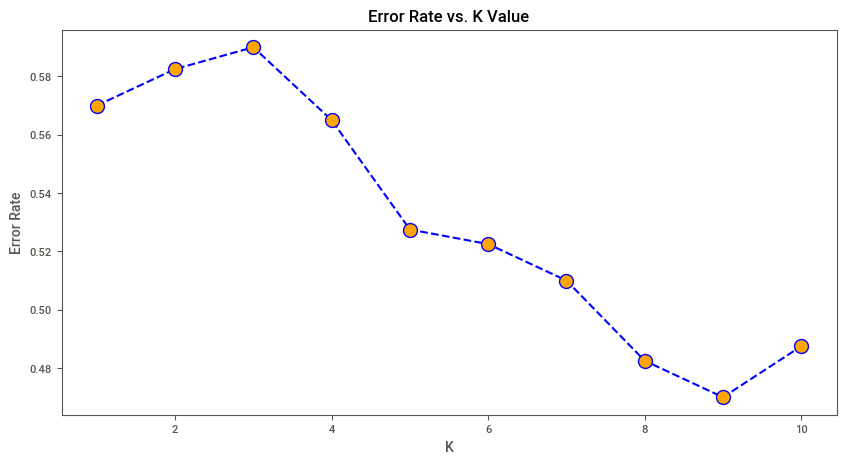

In [97]:
# plotting a graph to get multiple values of k
plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Conclusion: The values of k is sharply dropping from 3 hence the optimum values of k is 4.

In [98]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train) #traning the model with k values equal to 4


KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred_KNN=KNN.predict(X_test)
y_pred_KNN

array([0, 1, 1, 3, 0, 3, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3,
       2, 2, 1, 1, 2, 0, 1, 2, 0, 3, 0, 2, 0, 3, 1, 3, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 2, 3, 1, 0, 2, 2, 2, 0, 3, 3, 3, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 3, 1, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       3, 1, 0, 0, 3, 3, 1, 0, 2, 0, 0, 2, 0, 0, 3, 1, 0, 1, 1, 3, 2, 1,
       0, 3, 0, 0, 1, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 1,
       1, 3, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 3, 0, 3, 0,
       2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3, 1, 0, 0, 1, 2, 1, 3, 2, 0,
       3, 3, 0, 0, 1, 0, 3, 0, 2, 3, 0, 2, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0,
       3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 3, 0, 2, 0, 2, 2, 3, 0, 3, 3,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 3, 0, 2, 3, 2, 2, 1, 0, 1, 0,
       1, 0, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 0, 1, 1, 2, 1, 2, 3, 1, 2, 0,
       2, 3, 3, 1, 1, 3, 0, 2, 0, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 3, 2, 1,
       2, 1, 0, 2, 1, 0, 3, 0, 1, 1, 0, 0, 1, 3, 0,

In [100]:
acc_knn=accuracy_score(y_test,y_pred_KNN)
acc_knn

0.41

In [101]:
recall_score(y_test,y_pred_KNN,average='macro')

0.40956593163581223

In [102]:
precision_score(y_test,y_pred_KNN,average='macro')

0.42717390789864373

In [103]:
f1_knn=f1_score(y_test,y_pred_KNN,average='macro')
f1_knn

0.41114205714155866

In [104]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.47      0.63      0.54       102
           1       0.23      0.24      0.23       105
           2       0.28      0.24      0.26        95
           3       0.73      0.53      0.62        98

    accuracy                           0.41       400
   macro avg       0.43      0.41      0.41       400
weighted avg       0.43      0.41      0.41       400



# Boosting

In [105]:
#Object creation,training and prediction

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

In [106]:
y_pred_gb

array([1, 1, 3, 1, 2, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 3, 0, 1, 2, 0, 1, 3,
       3, 2, 0, 0, 1, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       3, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 3, 2, 2,
       1, 2, 1, 0, 2, 1, 3, 3, 2, 3, 1, 2, 0, 1, 0, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 1, 2, 3, 1, 3, 0, 0, 1, 0, 2, 3, 2, 0, 3, 0, 2, 0,
       2, 1, 0, 3, 2, 0, 0, 1, 0, 2, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 2, 0,
       3, 2, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 0,
       3, 2, 1, 0, 3, 0, 3, 3, 2, 1, 0, 0, 2, 1, 3, 2, 2, 2, 3, 1, 2, 3,
       2, 3, 0, 2, 0, 2, 0, 1, 0, 3, 2, 3, 3, 0, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 1, 1, 3, 3, 2, 3, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 3, 0, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 2, 2, 3, 2, 2,
       3, 1, 1, 3, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,

In [107]:
boost_acc=accuracy_score(y_test,y_pred_gb)
boost_acc

0.92

In [108]:
recall_score(y_test,y_pred_gb,average='macro')

0.9206740590973231

In [109]:
precision_score(y_test,y_pred_gb,average='macro')

0.9203819301717284

In [110]:
f1_gb=f1_score(y_test,y_pred_gb,average='macro')
f1_gb

0.9199729882938483

In [111]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.92      0.86      0.89       105
           2       0.85      0.92      0.88        95
           3       0.96      0.95      0.95        98

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### XGBoost

In [112]:
#Object creation,training and prediction

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [113]:
xgb_acc=accuracy_score(y_test,y_pred_xgb)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [114]:
recall_score(y_test,y_pred_xgb,average='macro')

0.916608748762663

In [115]:
precision_score(y_test,y_pred_xgb,average='macro')

0.9163780430021149

In [116]:
f1_xgb=f1_score(y_test,y_pred_xgb,average='macro')
f1_xgb

0.9162899053477339

In [117]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.91      0.90      0.91       105
           2       0.88      0.84      0.86        95
           3       0.91      0.95      0.93        98

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



# ANN

In [118]:
#Creating object with model and training the model

ANN=MLPClassifier(hidden_layer_sizes=(50,3),# 3 hidden layer with 50 nodes
                 learning_rate_init=0.1, #step size in gradient descennt
                 random_state=52)
ANN.fit(X_train,y_train)
y_pred_ANN=ANN.predict(X_test)

In [119]:
ann_acc=accuracy_score(y_test,y_pred_ANN)
ann_acc

0.8875

In [120]:
recall_score(y_test,y_pred_ANN,average='macro')

0.8888339546344853

In [121]:
precision_score(y_test,y_pred_ANN,average='macro')

0.9008390837944064

In [122]:
f1_ann=f1_score(y_test,y_pred_ANN,average='macro')
f1_ann

0.8876900821081875

In [123]:
print(classification_report(y_test,y_pred_ANN))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       102
           1       0.95      0.80      0.87       105
           2       0.75      0.97      0.84        95
           3       0.98      0.82      0.89        98

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



# Model Comparision 

In [124]:
models=pd.DataFrame({'Model':['LogisticRegression','SVM','SVM HPT','Desicion Tree Classifier','DT HPT','Random Forest Classifier','KNN',
                            'Boosting','XGBoost','ANN'],
                     'Score':[100*round(acc_lr,4),100*round(acc_svm,4),100*round(accuracy,4),100*round(acc_dt,4),
                             100*round(acc_dt_ht,4),100*round(acc_rf,4),100*round(acc_knn,4),100*round(boost_acc,4),
                              100*round(xgb_acc,4),100*round(ann_acc,4)]})

In [125]:
new=pd.DataFrame(models.sort_values(by='Score',ascending=False))

In [126]:
new

,Model,Score
0,LogisticRegression,96.50
2,SVM HPT,94.75
7,Boosting,92.00
8,XGBoost,91.75
5,Random Forest Classifier,89.25
9,ANN,88.75
1,SVM,86.75
4,DT HPT,85.50
3,Desicion Tree Classifier,82.75
6,KNN,41.00


# Model Comparision Report

<Axes: xlabel='Model', ylabel='Score'>

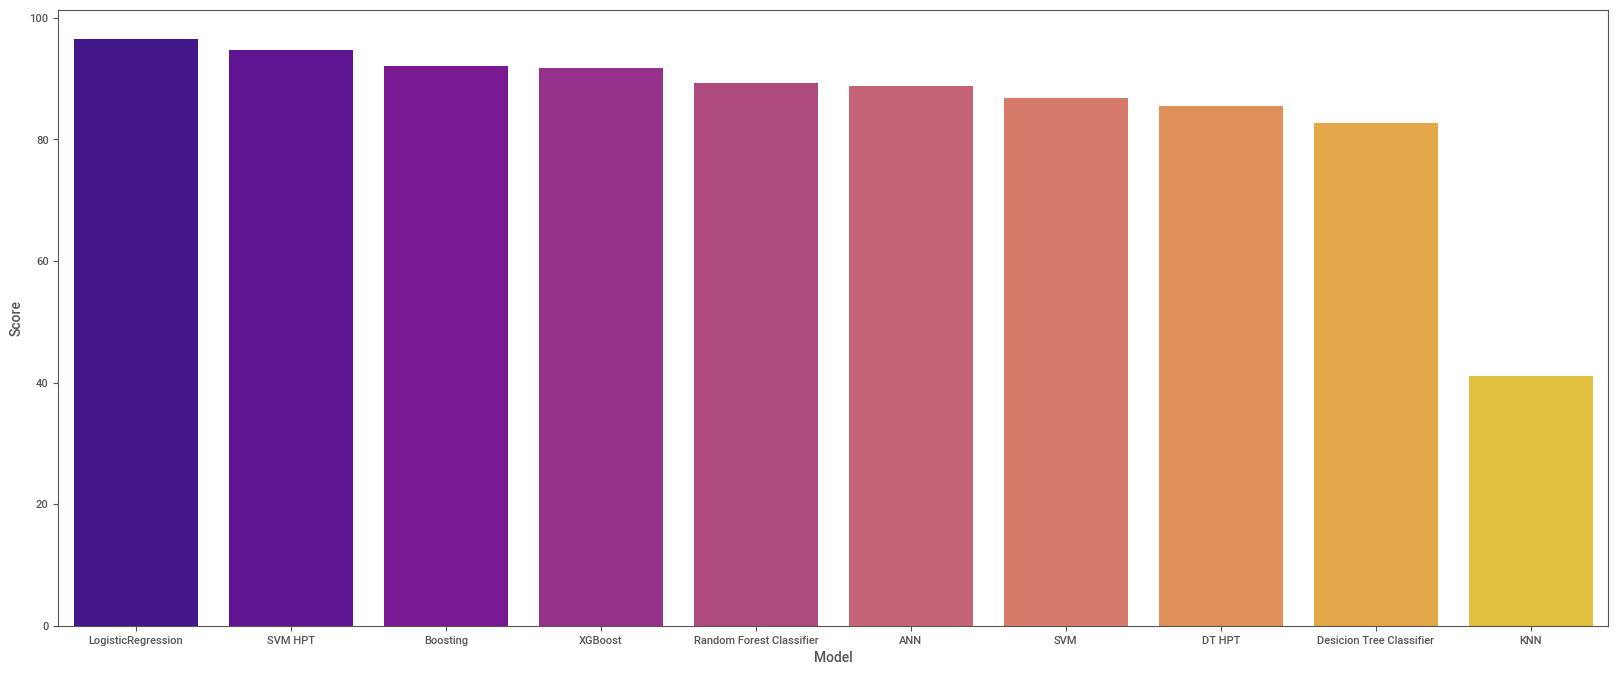

In [127]:
plt.figure(figsize=(20,8))
sns.barplot(data=new,x='Model',y='Score',palette='plasma')

To predict the liver disease the following classifier models are implemented:

1. Logistic Regression
2. Support Vector Classifier(SVC)
3. Decision Tree Classifier
4. Random Forest
5. KNN
6. ANN

Along with the classifier models, Hyperparameter Tuning and Ensemble techniques are also used to check whether the performance of the model is increased.

Among all the model tested, Logistic Regression gave the most efficient and moderately accurate result as compared to other models tested. Apart from Logistic Regression "SVM" with Hyperparameter tuning, "Boosting" and "XG Boost" model created and Ensemble technique shows promising accuracy of 90%.KNN shows low performance and it can be enhanced using more parameters.


In [ ]:
import pickle as pkl

In [ ]:
with open('regression.pkl','wb') as file:
    pkl.dump(lr,file)

In [ ]:
model=pkl.load(open('regression.pkl','rb'))

In [ ]:
print(model.predict([[1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1,411,8,2,151,1,0]]))